Text(0.5,1,'Prob 2c S-Val')

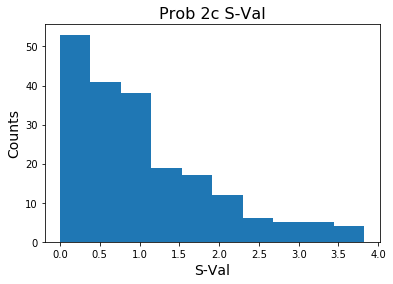

In [2]:
#Problem 2c
from random import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sig_T = .9
s_hw = np.zeros(200)
for i in range (0,200):
    rand = random ()
    s_hw[i] = -np.log(1 - rand)/sig_T # this is the s value from the equation from 2b
plt.hist(s_hw)
plt.xlabel("S-Val", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Prob 2c S-Val", fontsize=16)

Text(0.5,1,"Prob 2c Class' S-Val")

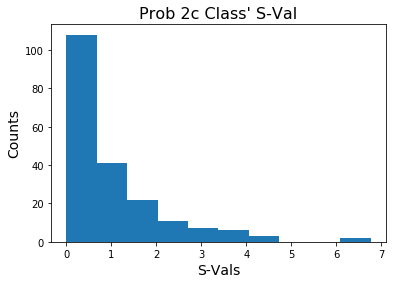

In [3]:
s_class = np.zeros(200)
for i in range(0,200):
    rand = random ()
    s_class[i] = -np.log(rand)/sig_T

plt.hist(s_class)
plt.xlabel("S-Vals", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Prob 2c Class' S-Val", fontsize=16)

In [ ]:
#The graphs are similar but not quite the same. The two equations are slightly different, with the class value being ln(rand)
#and my calculated value being ln(1-rand).

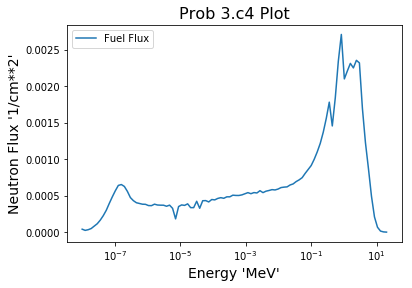

In [4]:
#Problem 3c4
Energy_vals = []
Neut_flux_fuel = []
Neut_flux_moderator = []

with open('data.txt', 'r') as trial_run:
    for line in trial_run:
        line = line.strip().split()
        Energy_vals.append(float(line[0]))
        Neut_flux_fuel.append(float(line[1]))

plt.plot(Energy_vals, Neut_flux_fuel, label='Fuel Flux')
plt.xscale("log")
plt.xlabel("Energy 'MeV'", fontsize=14)
plt.ylabel("Neutron Flux '1/cm**2'", fontsize=14)
plt.title('Prob 3.c4 Plot', fontsize=16)
plt.legend(loc='upper left')

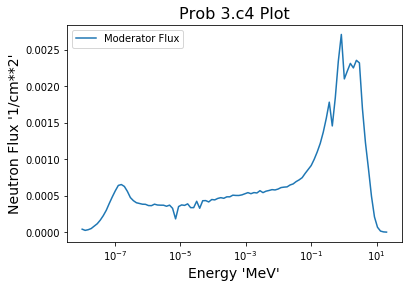

In [5]:
with open('data.txt', 'r') as trial_run:
    for line in trial_run:
        line = line.strip().split()
        Neut_flux_moderator.append(float(line[1]))
plt.plot(Energy_vals, Neut_flux_moderator, label='Moderator Flux')
plt.xscale("log")
plt.xlabel("Energy 'MeV'", fontsize=14)
plt.ylabel("Neutron Flux '1/cm**2'", fontsize=14)
plt.title('Prob 3.c4 Plot', fontsize=16)
plt.legend(loc='upper left')

In [ ]:
#Assume two-group neutron flux is for thermal (slower than 1 MeV) and fast (faster than 1 MeV) neutrons
#For the fuel's fast region, neutron flux is: 6.93540*10^-2 1/cm^2
#For the fuel's thermal region, neutron flux is: 5.29316*10^-2 1/cm^2
#For the moderator's thermal region, neutron flux is: 5.40077*10^-2 1/cm^2
#For the moderator's fast region, neutron flux is: 6.94880*10^-2 1/cm^2

Text(0.5,1,'Prob 3.c5 Thermal Plot')

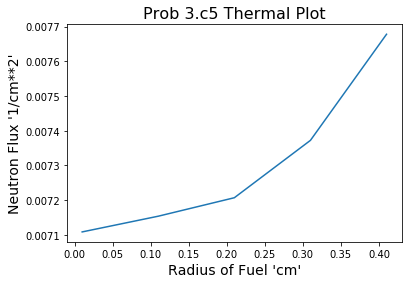

In [6]:
#Problem 3c5
Radius_of_fuel = (.41, .31, .21, .11,.01 )
Thermal_Flux = (7.67786E-03, 7.37215E-03, 7.20685E-03, 7.15363E-03, 7.10835E-03)
Fast_Flux = (6.16762E-02, 6.19644E-02, 6.20710E-02, 6.20652E-02, 6.21554E-02)
plt.plot(Radius_of_fuel, Thermal_Flux)
plt.xlabel("Radius of Fuel 'cm'", fontsize=14)
plt.ylabel("Neutron Flux '1/cm**2'", fontsize=14)
plt.title('Prob 3.c5 Thermal Plot', fontsize=16)

Text(0.5,1,'Prob 3.c5 Fast Plot')

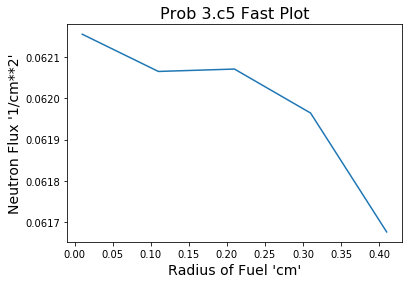

In [7]:
plt.plot(Radius_of_fuel, Fast_Flux)
plt.xlabel("Radius of Fuel 'cm'", fontsize=14)
plt.ylabel("Neutron Flux '1/cm**2'", fontsize=14)
plt.title('Prob 3.c5 Fast Plot', fontsize=16)

In [ ]:
#Problem 3c6
#As fuel rod radius increases, thermal neutron flux increases but fast neutron flux decreases. Overall, however, fast neutron
#flux is an order of magnitude higher than thermal flux, so it makes sense to limit fuel rod radius to maximize fast neutron
#flux in the reactor

In [8]:
#Problem 4 Set up
# Define the MACROSCOPIC cross-section [cm^-1] 
h20XSec = {"scatter": 1.1, "abs": 0.1}
uXSec =  {"scatter": 2.1, "abs": 1.5}

# Define problem boundaries locations
boundaries = [0, .1, .4, .5, .8]
volumes = np.array([.1, .3, .1, .3])

# Define the materials and total cross-section in each boundary
materials = [0, 1, 0, 1] # 0 is Uranium and 1 is water
totXSec = [3.6, 1.2, 3.6, 1.2]

In [9]:
# Define pdfs
xSecPDF = [{"scatter": 0.583, "abs": 0.417}, {"scatter": 0.917, "abs": 0.083}]

# Define a CDF
xSecCDF =  [{"scatter": (0.0, 0.583), "abs": (0.583, 1.0)}, {"scatter": (0.0, 0.917), "abs": (0.917, 1.0)}]

# Create a function to sample discrete CDFs
def sampDiscrete(cdf):
    r = np.random.rand()
    for k, v in cdf.items():
        if r > v[0] and r < v[1]:
            return k
        
# Test your discrete function
tally = {"scatter": 0, "abs": 0}
for i in range(10000):
    tally[sampDiscrete(xSecCDF[0])] += 1

print(tally)

{'scatter': 5818, 'abs': 4182}


In [10]:
class Particle(object):
    """!
    The class creates a particle object that represents the history of a 
    transport particle. This class is created with this simplified 1D 
    problem in mind, but it could be extended to further dimensions.
    """

    ##
    def __init__(self, xLoc=0.0, direction=1, energy=2.45, cell=0): # Current positions
        """!
        Constructor to build the particle class.
        @param self: <em> object pointer </em> \n
            The object pointer. \n
        @param xLoc: \e float \n
            The x coordinate location history. \n
        @param direction: \e integer \n
            The direction of the particle - options are +/-1. \n
        @param energy: \e float \n
            The energy of the particle. \n
        @param cell: \e integer \n
            The current cell location of the particle. \n
        """

        ## @var xLoc: \e float
        # The x coordinate location history.
        self.xLoc = xLoc
        ## @var direction: \e integer
        # The direction of the particle - options are +/-1.
        self.direction = direction
        ## @var energy: \e float
        # The energy of the particle.
        self.energy = energy
        ## @var cell: \e integer
        # The current cell location of the particle.
        self.cell = cell
        ## @var tally: <em> list of floats </em>
        # The tally of the path length traversed by cell
        self.tally = np.array([0., 0., 0., 0.])

    def __repr__(self):
        """!
        Particle print function.
        @param self: <em> particle pointer </em> \n
            The particle pointer. \n
        """
        return "Particle({}, {}, {})".format(self.xLoc, self.energy,
                                            self.cell)

    def __str__(self):
        """!
        Human readable particle print function.
        @param self: <em> particle pointer </em> \n
            The particle pointer. \n
        """

        header = ["\Particle:"]
        header += ["X        E      Cell"]
        header = "\n".join(header)+"\n"
        tmp = ""
        tmp += "{0:<7}{1}{2}\n".format(self.xLoc, self.energy, self.cell)
        header = header + tmp
        return header

In [11]:

#! Write a function to sample the number of MFP and save it to the particle class
def calcNumMFP(particle):
    particle.numMFP = -np.log(np.random.rand())
# Calculate the distance to the next collision given a number of collisions and a total cross-section
def distToCol(numMFP, xSec):
    return numMFP/xSec

In [12]:
#! Write a function to calculate the distance to the next boundary (Ashwin)
def bdydist (particle, boundaries):
    position=particle.xLoc
    direction=particle.direction
    cellnum=particle.cell
    lb=boundaries[cellnum]
    hb=boundaries[cellnum+1]
    if direction == 1:
        return hb-position
    else:
        return position-lb

In [13]:
#! Write a function to calculate the distance to the next boundary (Bevins)
def calcDistToBound(particle, bounds):
    if particle.direction == 1:
        return bound[particle.cell + 1] - particle.xLoc
    elif particle.direction == -1:
        return particle.xLoc - bound[particle.cell]
    else:
        print ("Error, Your particle is moving on odd directions!")

In [14]:
def updateEnergy(particle):
    particle.energy = particle.energy - np.random.rand()*(particle.energy)

In [15]:
def updateDir(particle):
    r = np.random.rand()
    if r < 0.5:
        particle.direction = particle.direction*-1 
    else:
        particle.direction = particle.direction*1

In [16]:
#Ryan and Ashwin walked me through this but their code worked and mine did not, so here is their code because I do not 
#understand how to do it from scratch.
#! Write a function to transport a particle from the branch point in Figure 1 from Lesson 9 notes.
def transport(particle, s_b, s_c, CDF, materials, bounds, totXSec):
    while particle.energy > 0:
        if s_b<s_c: #this is for the case where the particle will not collide    
            if 0<=particle.cell+particle.direction<=3: # this checks if particle is within our cells 0-3
                particle.tally[particle.cell]+=s_b #adds s_b to our tally
                particle.xLoc+=(s_b*particle.direction) # updates xLoc by moving particle w/magnitude of s_b*direction
                particle.numMFP=particle.numMFP-(totXSec[particle.cell]*s_b) #this updates the number of MFPs 
                particle.cell=particle.cell + particle.direction #this updates the cell that our particle is in
                s_b=bdydist(particle,boundaries) ##passes particle and boundries into function above
                s_c=distToCol(particle.numMFP, totXSec[particle.cell]) ##passes MFP and Xsec into calcDistToBound function
            else: 
                break #breaks the loop if s_b=>s_c
        elif s_c<=s_b: #for the case s_c < s_b
            if sampDiscrete(CDF[materials[particle.cell]])=='scatter': #this is for the case where there is a scatter
                particle.tally[particle.cell]+=s_c #update the particle tally
                particle.xLoc+=s_c*particle.direction #updates xLoc by moving particle w/magnitude of s_b*direction
                updateDir(particle) #moves particle in a random direction based upon function above
                updateEnergy(particle) #updates energy based on random value from function above
                calcNumMFP(particle) #randomly updates the number of MFP from function above
                s_c=distToCol(particle.numMFP, totXSec[particle.cell]) #calls function above and Xsec data to perform calc
                s_b=bdydist(particle,boundaries) # updates s_b based on function above
            if sampDiscrete(CDF[materials[particle.cell]])=='abs': #here our particle is being absorbed
                particle.tally[particle.cell] +=s_c # updates our tally
                break
        else:
            print('Particle has not transported') 
    return particle.tally

In [17]:
#! Write the main controller program using the classes and functions defined above
N = 2000 #sets number of particles to pass through
tally = np.array([0., 0., 0., 0.]) 
tally2=np.zeros((N,4))#populates an array for our initial tally 
for i in range(N): # a loop to run through 2000 sample particles
    particle=Particle() # calls our particle class
    calcNumMFP(particle) #calls function above and passes particle through it
    s_c=distToCol(particle.numMFP, totXSec[particle.cell]) #calculates our s_c
    s_b=bdydist(particle,boundaries) #calculates our s_b
    tally2[i,:]=transport(particle,s_b,s_c,xSecCDF,materials,boundaries,totXSec) #updates our tally

In [18]:
#Problem 4.c
flux = sum(tally2)/(volumes*N)
print(flux)

[1.27663501 0.87567266 0.85717661 0.13981595]


In [19]:
sumosquares=sum(tally2**2)
squareofsums=sum(tally2)**2
R=(np.sqrt((sumosquares/squareofsums)-(1/N)))/(volumes)
print(R)

[0.22238508 0.0706863  0.33457381 0.30883125]


In [ ]:
#Again, I could not understand how to do this problem on my own. Ashwin and Ryan Chapman did all the work here.